## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import call
from IPython.display import Image

from lazypredict import Supervised
from lazypredict.Supervised import LazyClassifier

import sklearn
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# from tune_sklearn import TuneGridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.width", 500)

In [2]:
# Load data
data = pd.read_csv("../data/dataset_cybersecurity_michelle.csv")
data.head(5)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.246,1,13335,1640,551,2,2,5,292,0,-1,0,0,0,1
1,2,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,329,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,24,0,0,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,305,0,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,302,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.249,1,14618,-1,-1,2,4,2,52,0,1,0,0,0,1
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,24,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.529,0,13335,5355,123,2,2,0,298,1,1,0,0,0,0
3,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,23,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,17,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.112,1,36352,-1,-1,1,2,5,1792,0,0,0,0,0,1
4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,23,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,23,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.172,0,-1,7865,1631,1,2,1,299,1,1,0,0,0,0


In [3]:
# Overview of data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129698 entries, 0 to 129697
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 110.8 MB


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000,129698.000
mean,2.221,0.370,0.132,1.490,0.011,0.240,0.026,0.164,0.004,0.001,0.004,0.002,0.003,0.005,0.001,0.002,0.124,1.054,39.098,1.848,0.120,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.439,18.402,0.003,0.004,-0.213,-0.256,-0.393,0.992,-0.460,-0.451,-0.456,-0.455,-0.458,-0.459,-0.457,-0.459,-0.459,-0.456,-0.460,-0.459,-0.399,12.798,-0.266,-0.393,-0.431,-0.460,-0.460,-0.458,-0.460,-0.459,-0.459,-0.460,-0.460,-0.460,-0.459,-0.459,-0.460,-0.460,-0.416,3.366,-0.781,-0.858,-0.839,-0.870,-0.892,-0.682,-0.881,-0.754,-0.902,-0.902,-0.902,-0.901,-0.900,-0.902,-0.902,-0.902,-0.840,6.295,-0.874,-0.720,0.021,0.787,-0.022,31857.094,3120.121,333.854,1.131,2.790,1.711,5806.973,0.505,0.332,0.001,0.002,0.006,0.402
std,1.315,1.200,0.706,1.964,0.124,1.027,0.293,0.992,0.098,0.081,0.084,0.077,0.125,0.336,0.068,0.102,1.892,0.

In [4]:
# Check for missing values
data.isnull().sum()
# data.dropna(inplace=True)
# data.fillna(data.mean(), inplace=True)

qty_dot_url                   0
qty_hyphen_url                0
qty_underline_url             0
qty_slash_url                 0
qty_questionmark_url          0
qty_equal_url                 0
qty_at_url                    0
qty_and_url                   0
qty_exclamation_url           0
qty_space_url                 0
qty_tilde_url                 0
qty_comma_url                 0
qty_plus_url                  0
qty_asterisk_url              0
qty_hashtag_url               0
qty_dollar_url                0
qty_percent_url               0
qty_tld_url                   0
length_url                    0
qty_dot_domain                0
qty_hyphen_domain             0
qty_underline_domain          0
qty_slash_domain              0
qty_questionmark_domain       0
qty_equal_domain              0
qty_at_domain                 0
qty_and_domain                0
qty_exclamation_domain        0
qty_space_domain              0
qty_tilde_domain              0
qty_comma_domain              0
qty_plus

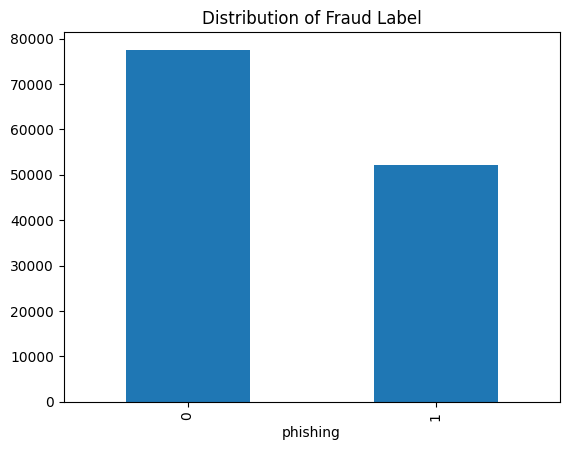

In [5]:
# Distribution of fraud label

# numerical_column = "time_response"
# category_columns = data.columns.drop("time_response")

data["phishing"].value_counts().sort_index().plot.bar(x="Target Value", y="Number of Occurrences", title="Distribution of Fraud Label")
plt.show()

In [6]:
# # Histogram
# plt.hist(data["numerical_column"], bins=20, color="skyblue", edgecolor="black")
# plt.title("Histogram of Numerical Column")
# plt.xlabel("Value")
# plt.ylabel("Frequency")
# plt.show()

# # Box plot
# plt.boxplot(data["numerical_column"])
# plt.title("Box plot of Numerical Column")
# plt.ylabel("Value")
# plt.show()

# # Scatter plot
# plt.scatter(data["numerical_column1"], data["numerical_column2"], color="green")
# plt.title("Scatter plot of Numerical Column1 vs Numerical Column2")
# plt.xlabel("Numerical Column1")
# plt.ylabel("Numerical Column2")
# plt.show()

# # Line plot
# plt.plot(data["index_column"], data["numerical_column"], marker="o", color="blue", linestyle="-")
# plt.title("Line plot of Numerical Column over Index Column")
# plt.xlabel("Index")
# plt.ylabel("Numerical Column")
# plt.show()

# # Bar plot
# plt.bar(data["category_column"], data["numerical_column"], color="orange")
# plt.title("Bar plot of Numerical Column across Categories")
# plt.xlabel("Category")
# plt.ylabel("Numerical Column")
# plt.xticks(rotation=45)
# plt.show()

## Model Fitting

In [7]:
# Train test split
X = data.drop("phishing", axis=1)
y = data["phishing"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20, stratify=data["phishing"])

Lazy prediction runs multiple classification models.

In [8]:
# List all claasifiers in lazy prediction
Supervised.CLASSIFIERS

[('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('BernoulliNB', sklearn.naive_bayes.BernoulliNB),
 ('CalibratedClassifierCV', sklearn.calibration.CalibratedClassifierCV),
 ('CategoricalNB', sklearn.naive_bayes.CategoricalNB),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('DummyClassifier', sklearn.dummy.DummyClassifier),
 ('ExtraTreeClassifier', sklearn.tree._classes.ExtraTreeClassifier),
 ('ExtraTreesClassifier', sklearn.ensemble._forest.ExtraTreesClassifier),
 ('GaussianNB', sklearn.naive_bayes.GaussianNB),
 ('KNeighborsClassifier',
  sklearn.neighbors._classification.KNeighborsClassifier),
 ('LabelPropagation',
  sklearn.semi_supervised._label_propagation.LabelPropagation),
 ('LabelSpreading', sklearn.semi_supervised._label_propagation.LabelSpreading),
 ('LinearDiscriminantAnalysis',
  sklearn.discriminant_analysis.LinearDiscriminantAnalysis),
 ('Linear

In [9]:
# Remove problematic classifier
Supervised.CLASSIFIERS.remove(("NuSVC", sklearn.svm._classes.NuSVC))
Supervised.CLASSIFIERS.remove(('SVC', sklearn.svm._classes.SVC))

In [10]:
# Lazy prediction
clf = LazyClassifier(verbose=1, ignore_warnings=False, custom_metric=None, predictions=True, classifiers="all" ) # verbose set as 1 to monitor progress
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

  0%|          | 0/27 [00:00<?, ?it/s]

  4%|▎         | 1/27 [00:14<06:23, 14.76s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9265227447956823, 'Balanced Accuracy': 0.9231239206302253, 'ROC AUC': 0.9231239206302253, 'F1 Score': 0.9264877067301567, 'Time taken': 14.756453514099121}


  7%|▋         | 2/27 [00:31<06:31, 15.67s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.9843484965304549, 'Balanced Accuracy': 0.9831284037875985, 'ROC AUC': 0.9831284037875986, 'F1 Score': 0.9843390108923571, 'Time taken': 16.30264973640442}


 11%|█         | 3/27 [00:31<03:33,  8.89s/it]

{'Model': 'BernoulliNB', 'Accuracy': 0.8402852737085582, 'Balanced Accuracy': 0.8623674673478425, 'ROC AUC': 0.8623674673478425, 'F1 Score': 0.8415394061669077, 'Time taken': 0.8222217559814453}


 15%|█▍        | 4/27 [01:18<09:07, 23.82s/it]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.779568234387047, 'Balanced Accuracy': 0.7266978784075567, 'ROC AUC': 0.7266978784075567, 'F1 Score': 0.7558506574559285, 'Time taken': 46.70881485939026}


 19%|█▊        | 5/27 [01:19<05:39, 15.42s/it]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 22%|██▏       | 6/27 [01:21<03:53, 11.12s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.9799537393986122, 'Balanced Accuracy': 0.9792490873972077, 'ROC AUC': 0.9792490873972077, 'F1 Score': 0.9799556223034945, 'Time taken': 2.7599904537200928}


 26%|██▌       | 7/27 [01:22<02:33,  7.67s/it]

{'Model': 'DummyClassifier', 'Accuracy': 0.5978797224363916, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.44741810973803947, 'Time taken': 0.566856861114502}


 30%|██▉       | 8/27 [01:23<01:44,  5.49s/it]

{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.9785659213569776, 'Balanced Accuracy': 0.9779943027937694, 'ROC AUC': 0.9779943027937693, 'F1 Score': 0.978571930270965, 'Time taken': 0.8238084316253662}


 33%|███▎      | 9/27 [01:46<03:18, 11.01s/it]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.9870470316114109, 'Balanced Accuracy': 0.9865465655720428, 'ROC AUC': 0.9865465655720429, 'F1 Score': 0.9870472348178908, 'Time taken': 23.161110401153564}


 37%|███▋      | 10/27 [01:47<02:15,  7.97s/it]

{'Model': 'GaussianNB', 'Accuracy': 0.7288743253662298, 'Balanced Accuracy': 0.6700366595133089, 'ROC AUC': 0.6700366595133088, 'F1 Score': 0.6949262531145344, 'Time taken': 1.1465084552764893}


 41%|████      | 11/27 [02:06<03:00, 11.25s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9579799537393986, 'Balanced Accuracy': 0.9563839772180489, 'ROC AUC': 0.9563839772180488, 'F1 Score': 0.957983244189513, 'Time taken': 18.698037147521973}


 44%|████▍     | 12/27 [02:06<02:00,  8.04s/it]

LabelPropagation model failed to execute
Unable to allocate 80.2 GiB for an array with shape (103758, 103758) and data type float64


 48%|████▊     | 13/27 [02:07<01:21,  5.81s/it]

LabelSpreading model failed to execute
Unable to allocate 80.2 GiB for an array with shape (103758, 103758) and data type float64


 52%|█████▏    | 14/27 [02:10<01:05,  5.02s/it]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.9033924441017733, 'Balanced Accuracy': 0.911203905780408, 'ROC AUC': 0.911203905780408, 'F1 Score': 0.9041737744796897, 'Time taken': 3.190413236618042}


 56%|█████▌    | 15/27 [03:08<04:09, 20.77s/it]

{'Model': 'LinearSVC', 'Accuracy': 0.9219352351580571, 'Balanced Accuracy': 0.9212806652158436, 'ROC AUC': 0.9212806652158436, 'F1 Score': 0.9221143080212535, 'Time taken': 57.27186822891235}


 59%|█████▉    | 16/27 [03:12<02:52, 15.70s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.9223592906707787, 'Balanced Accuracy': 0.9210702888867217, 'ROC AUC': 0.9210702888867217, 'F1 Score': 0.9224926061877424, 'Time taken': 3.9021620750427246}


 63%|██████▎   | 17/27 [03:12<01:52, 11.22s/it]

{'Model': 'NearestCentroid', 'Accuracy': 0.8402852737085582, 'Balanced Accuracy': 0.8623674673478425, 'ROC AUC': 0.8623674673478425, 'F1 Score': 0.8415394061669077, 'Time taken': 0.8002638816833496}


 67%|██████▋   | 18/27 [03:13<01:13,  8.19s/it]

{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.905242868157286, 'Balanced Accuracy': 0.9064892098890394, 'ROC AUC': 0.9064892098890394, 'F1 Score': 0.9056549098317407, 'Time taken': 1.1335947513580322}


 70%|███████   | 19/27 [03:15<00:48,  6.05s/it]

{'Model': 'Perceptron', 'Accuracy': 0.8913646877409407, 'Balanced Accuracy': 0.8814169949618537, 'ROC AUC': 0.8814169949618537, 'F1 Score': 0.8906597530503608, 'Time taken': 1.0864577293395996}


 74%|███████▍  | 20/27 [03:17<00:35,  5.04s/it]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.7067077872012336, 'Balanced Accuracy': 0.6371540823531766, 'ROC AUC': 0.6371540823531766, 'F1 Score': 0.6547016636674761, 'Time taken': 2.675588369369507}


 78%|███████▊  | 21/27 [03:38<00:58,  9.73s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9889360061680802, 'Balanced Accuracy': 0.9885029662206275, 'ROC AUC': 0.9885029662206276, 'F1 Score': 0.9889360929726403, 'Time taken': 20.66901469230652}


 81%|████████▏ | 22/27 [03:39<00:35,  7.06s/it]

{'Model': 'RidgeClassifier', 'Accuracy': 0.9037008481110255, 'Balanced Accuracy': 0.9114304311438587, 'ROC AUC': 0.9114304311438587, 'F1 Score': 0.9044760771502401, 'Time taken': 0.8447680473327637}


 85%|████████▌ | 23/27 [03:41<00:22,  5.75s/it]

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.9035851966075559, 'Balanced Accuracy': 0.9113337131091692, 'ROC AUC': 0.9113337131091691, 'F1 Score': 0.9043622635179099, 'Time taken': 2.683338165283203}


 89%|████████▉ | 24/27 [03:43<00:13,  4.60s/it]

{'Model': 'SGDClassifier', 'Accuracy': 0.9158057054741712, 'Balanced Accuracy': 0.9185558981499784, 'ROC AUC': 0.9185558981499785, 'F1 Score': 0.9162361247094858, 'Time taken': 1.9317958354949951}
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


 96%|█████████▋| 26/27 [03:46<00:03,  3.02s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.9710871241326138, 'Balanced Accuracy': 0.9697152538598217, 'ROC AUC': 0.9697152538598217, 'F1 Score': 0.9710807333827347, 'Time taken': 2.3530070781707764}
[LightGBM] [Info] Number of positive: 41721, number of negative: 62037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3191
[LightGBM] [Info] Number of data points in the train set: 103758, number of used features: 96
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.402099 -> initscore=-0.396726
[LightGBM] [Info] Start training from score -0.396726


100%|██████████| 27/27 [03:48<00:00,  8.48s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.9633770239013107, 'Balanced Accuracy': 0.962058893145249, 'ROC AUC': 0.962058893145249, 'F1 Score': 0.9633821771899386, 'Time taken': 2.7296574115753174}


In [11]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.989,0.989,0.989,0.989,20.669
ExtraTreesClassifier,0.987,0.987,0.987,0.987,23.161
BaggingClassifier,0.984,0.983,0.983,0.984,16.303
DecisionTreeClassifier,0.980,0.979,0.979,0.980,2.760
ExtraTreeClassifier,0.979,0.978,0.978,0.979,0.824
XGBClassifier,0.971,0.970,0.970,0.971,2.353
LGBMClassifier,0.963,0.962,0.962,0.963,2.730
KNeighborsClassifier,0.958,0.956,0.956,0.958,18.698
AdaBoostClassifier,0.927,0.923,0.923,0.926,14.756


Through lazy prediction, the best performing models are **RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, DecisionTreeClassifier**

In [12]:
# Rf Classifier
clf = RandomForestClassifier().fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
 
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Recall:", recall)

Accuracy: 0.988242097147263
Recall: 0.9854280510018215


Let's experiment if replacing -1 helps the performance

In [13]:
# Create a new DataFrame 'cleaned_df' with -1 replaced by mean
cleaned_data = data.copy()  # Make a copy of the original DataFrame

# Replace -1 with the mean of each column
for col in cleaned_data.columns:
    if -1 in cleaned_data[col].values:
        mean_val = cleaned_data[col][cleaned_data[col] != -1].mean()  # Calculate the mean excluding -1
        cleaned_data[col] = cleaned_data[col].replace(-1, mean_val)

# Train test split
clean_X = cleaned_data.drop("phishing", axis=1)
clean_y = cleaned_data["phishing"]
clean_X_train, clean_X_test, clean_y_train, clean_y_test = train_test_split(clean_X, clean_y, test_size=0.2, random_state=20, stratify=cleaned_data["phishing"])

# Rf Classifier
clean_clf = RandomForestClassifier().fit(clean_X_train, clean_y_train)

# Make predictions on the test set
clean_y_pred = clean_clf.predict(clean_X_test)
 
# Calculate accuracy
accuracy = accuracy_score(clean_y_test, clean_y_pred)
recall = recall_score(clean_y_test, clean_y_pred)
print("Accuracy:", accuracy)
print("Recall:", recall)


Accuracy: 0.9885119506553586
Recall: 0.9853321829163072


In [14]:
# Hyperparameters
print("max_depth: ", max((e.tree_.max_depth for e in clf.estimators_)))
print("min_depth: ", min((e.tree_.max_depth for e in clf.estimators_)))
print("max_depth: ", clf.get_params())

max_depth:  49
min_depth:  33
max_depth:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


#### !! CAUTION: This cell takes long time to run !!

In [15]:
# Hyperparameter tuning

# param_grid = {
#     "estimator": [DecisionTreeClassifier(), ExtraTreesClassifier(), RandomForestClassifier()],
#     "base_estimator__max_depth" : [1, 2, 3, 4, 5],
#     "max_samples" : [0.05, 0.1, 0.2, 0.5]
# }

param_grid = {
    "n_estimators": [10, 50, 100, 200, 500],
    "max_depth": [10, 30, 50, 70, 90],
    "min_samples_split": [2, 4, 6, 8 ,10],
    "max_features": ["sqrt", "log2"]
}

model = RandomizedSearchCV(clean_clf, param_grid, cv=5, n_iter=20, verbose=1)
model.fit(clean_X_train, clean_y_train)

# Get the best hyperparameters
best_params = model.best_params_

# Make predictions on the test set
y_pred = model.predict(clean_X_test)
 
# Calculate accuracy
accuracy = accuracy_score(clean_y_test, y_pred)
recall = recall_score(clean_y_test, y_pred)
print("Accuracy:", accuracy)
print("Recall:", recall)
print(f"Best Hyperparameters: {best_params}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Accuracy: 0.9887047031611411
Recall: 0.9854280510018215
Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 50}


## Evaluation

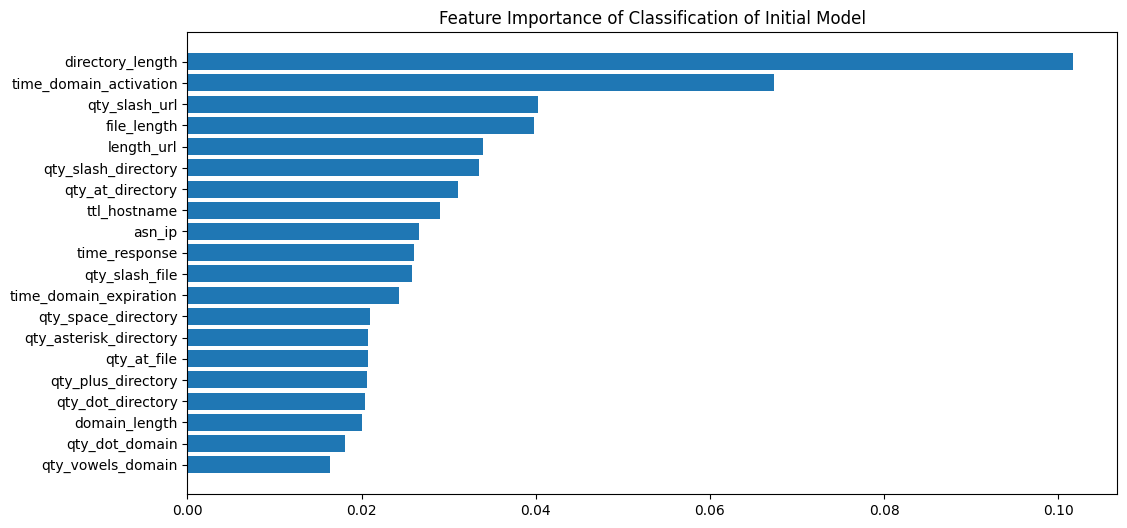

In [17]:
# Feature importance of initial model

# feature_importance = clf.feature_importances_
feature_importances = np.mean([
    tree.feature_importances_ for tree in clf.estimators_
], axis=0)
sorted_idx = np.argsort(feature_importances)[-20:]
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title("Feature Importance of Classification of Initial Model")
plt.show()

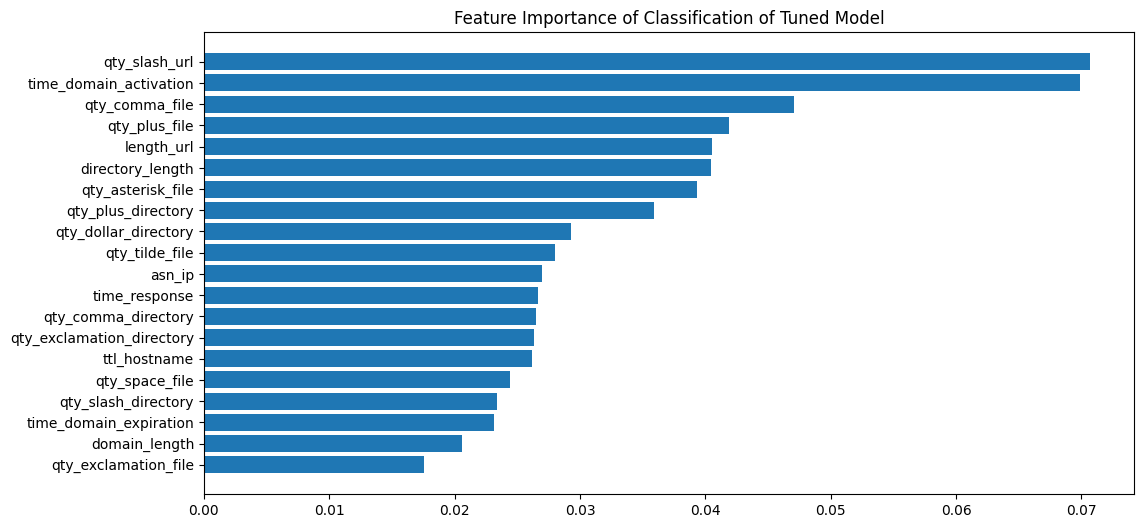

In [18]:
# Feature importance of tuned model

# feature_importance = model.feature_importances_
feature_importances = np.mean([
    tree.feature_importances_ for tree in model.best_estimator_
], axis=0)
sorted_idx = np.argsort(feature_importances)[-20:]
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title("Feature Importance of Classification of Tuned Model")
plt.show()